#ScatNet+SVM with visualization

In [32]:
from kymatio.keras import Scattering2D

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense

from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.keras import utils
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.
print(x_test.shape)

(10000, 28, 28)


#ScatNet code from Kymatio

In [7]:
scat_x_train = Scattering2D(J=2, L=8)(x_train)
final_scat_x_train = Flatten()(scat_x_train)
scat_x_test = Scattering2D(J=2, L=8)(x_test)
final_scat_x_test = Flatten()(scat_x_test)
print(final_scat_x_train.shape)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1000, 3969)


#normalization and visualization

In [13]:
stand_x_test = StandardScaler().fit_transform(final_scat_x_test) # normalizing the features

(5.9578892028460905e-18, 0.9999999999999999)

In [15]:
pca = PCA(n_components=20)
pca_result_test = pca.fit_transform(stand_x_test)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

Variance PCA: 0.7722700165135272


In [16]:
tsne = TSNE(n_components=2, verbose = 1)
tsne_results_test = tsne.fit_transform(pca_result_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.015s...
[t-SNE] Computed neighbors for 1000 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 11.982948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.429260
[t-SNE] KL divergence after 1000 iterations: 0.939345


#classification by SVM

In [37]:
predictor = svm.SVC(gamma='scale', C=1.0, decision_function_shape='ovr', kernel='rbf')
predictor.fit(final_scat_x_train, y_train)
result = predictor.predict(final_scat_x_test)
accurancy = np.sum(np.equal(result, y_test)) / 10000
print(accurancy)

(5000, 2)
0.97


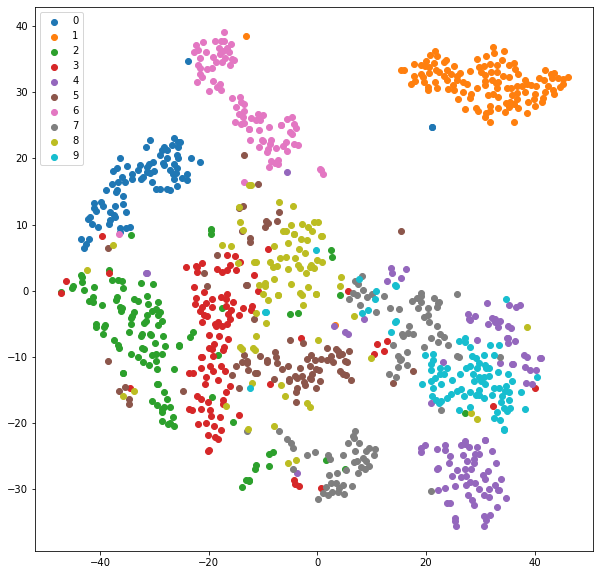

In [24]:
visual_y_test = utils.to_categorical(y_test[:2000], num_classes = 10)
color_map = np.argmax(visual_y_test, axis=1)
plt.figure(figsize=(10,10))
for cl in range(10):
    indices = np.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_results_test[indices,0], tsne_results_test[indices, 1], label=cl)
plt.legend()
plt.show()